🔹 SVM Accuracy: 0.9561


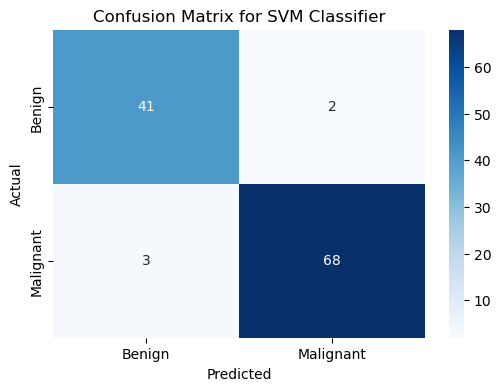

 Logistic Regression Accuracy: 0.9737
SVM performs worse than Logistic Regression.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 SVM Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

print(f" Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"SVM performs {'better' if accuracy > log_reg_acc else 'worse'} than Logistic Regression.")
